# Numerical Integration

Numerical integration is nothing but a way to find out the area under a curve.

The formulae used to calculate the area under the curve is collectively known as "***Newton cotes formulae***".

However, there are two ways to apply the formulae ,i.e.,

- Single-Step
- Multi-Step

## Single Application of Newton Cotes Formulae :

Formulae to find out the area under the curve is :

### 1. Trapezoidal Rule

The formula for this rule is :

$$\int_{a}^{a+h} f(x) dx = \frac{h}{2}(f(a)+f(a+h));\hspace{0.3cm} (h = b-a) $$

The LTE is : $\mathcal O(h^3)$

### 2. Simpson's One-third Rule

The formula for Simpson's one-third rule is :

$$\int_{a}^{a+2h} f(x) dx = \frac{h}{3}(f(a)+4f(a+h)+f(a+2h));\hspace{0.3cm} (h = \frac{b-a}{2}) $$

The LTE is : $\mathcal O(h^5)$

### 3. Simpson's Three-eight Rule

The formula for the Simpson's three-eight rule is :

$$\int_{a}^{a+3h} f(x) dx = \frac{3h}{8}(f(a)+3f(a+h)+3f(a+2h)+f(a+3h));\hspace{0.3cm} (h = \frac{b-a}{3}) $$

The LTE is : $\mathcal O(h^5)$

The above methods are collectively called as "*Newton Cotes Formulae*".

Looking at the LTE of the above three methods, we can say that Simpson's one-third rule and Simpson's three-eight rule are more accurate than the Trapezoidal rule.

***Example :***<br>
Let's perform numerical integration upon the following problem :

Consider the following equation : $f(x) = 2-x+ln(x)$<br>
The integration of the above function, gives us the result as : $x-\frac{x^2}{2}+xln(x)$

Let's use Trapezoidal and Simpson one-third rules to compare the results with the true value.

***Solution :***<br>
The MATLAB code for the above problem is :

In [2]:
% Declaring limits :

a = 1;
b = 2;

% Getting true values at specified limits :

TrueVal_a = a - ( (a^2)/2 ) + ( a * log(a) );
TrueVal_b = b - ( (b^2)/2 ) + ( b * log(b) );

TrueVal = TrueVal_a - TrueVal_b ;

% Given Function :

function Func = Intfunc(x)
    Func = 2 - x + log(x);
end

%% Trapezoidal Rule (Single Application) %%
%% ------------------------------------- %%

ht = b-a;

TrapVal = (ht/2) * (Intfunc(a) + Intfunc(a+ht));

% Error associated

TrapzErr = abs(TrueVal - TrapVal);

% Printing Results

fprintf('Trapezoidal Methond\n----------------------------\n');
fprintf('The true value of the numerical integration is : %f\n',TrueVal);
fprintf('The value of the numerical integration is : %f\n',TrapVal);
fprintf('The error associated is : %d\n\n',TrapzErr);

%% Simpson's One-Third Rule (Single Application) %%
%% --------------------------------------------- %%

hs = (b-a)/2;

SimpVal = (hs/3) * (Intfunc(a) + 4*Intfunc(a+hs) + Intfunc(a+2*hs));

% Error associated

SimpErr = abs(TrueVal - SimpVal);

% Printing Results

fprintf('Simpson`s One-Third Rule Methond\n----------------------------\n');
fprintf('The true value of the numerical integration is : %f\n',TrueVal);
fprintf('The value of the numerical integration is : %f\n',SimpVal);
fprintf('The error associated is : %d\n',SimpErr);

Trapezoidal Methond
----------------------------
The true value of the numerical integration is : -0.886294
The value of the numerical integration is : 0.846574
The error associated is : 1.73287

Simpson`s One-Third Rule Methond
----------------------------
The true value of the numerical integration is : -0.886294
The value of the numerical integration is : 0.885835
The error associated is : 1.77213


## Multi-step Application of Newton Cotes Formulae :

Formulae to find out the area under the curve is :

### Trapezoidal Rule

The formula for this rule is :

***For interval-1***
$$I_1 = \frac{h}{2}(f(a)+f(a+h))$$

***For interval-2***
$$I_2 = \frac{h}{2}(f(a)+f(a+2h))$$

and so on ...

$$I = I_1 + I_2 + ... + I_n; \hspace{0.3cm} (h = \frac{b-a}{n})$$

The LTE: $\mathcal O(h^3)$


We can take up the previous problem to be solved with multi-step trapezoidal method, to see how the error varies from single-step application :

Trapezoidal Method : Multi-Step Method
--------------------------------------
The true value of the numerical integration is : -0.886294

 For a step size = 0.500000, the value of the numerical integration by Trapizoidal method = 0.876019 and the error = 1.76231

 For a step size = 0.200000, the value of the numerical integration by Trapizoidal method = 0.884632 and the error = 1.77093

 For a step size = 0.100000, the value of the numerical integration by Trapizoidal method = 0.885878 and the error = 1.77217

 For a step size = 0.050000, the value of the numerical integration by Trapizoidal method = 0.886190 and the error = 1.77248


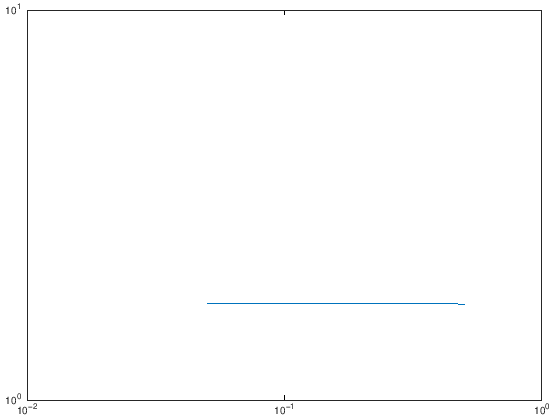

In [7]:
% Declaring Steps :

n = [2,5,10,20];

%% Trapezoidal Rule (Multi-step Application) %%
%% ------------------------------------- %%

StepSize = zeros(1,4);
ApproxVal = zeros(1,4);
ErrorVal = zeros(1,4);

for i = 1:4
    N = n(i);
    h = (b-a)/N;
    
    Intervals = a:h:b;
    
    Fvec = Intfunc(Intervals);
    
    Ivals = (h/2)*(Fvec(:,1:end-1) + Fvec(:,2:end));
    
    StepSize(i) = h;
    ApproxVal(i) = sum(Ivals);
    ErrorVal(i) = abs(TrueVal - ApproxVal(i));
end

fprintf('Trapezoidal Method : Multi-Step Method\n--------------------------------------\n');
fprintf('The true value of the numerical integration is : %f\n',TrueVal);

for i=1:4
    fprintf('\n For a step size = %f, the value of the numerical integration by Trapizoidal method = %f and the error = %d\n',StepSize(i),ApproxVal(i),ErrorVal(i))
end

loglog(StepSize,ErrorVal)

The GTE for the various Newton cotes equation are :

GTE : Trapezoidal Rule = $\mathcal O(h^2)$<br>
GTE : Simpson one-third Rule = $\mathcal O(h^4)$<br>
GTE : Simpson three-eight Rule = $\mathcal O(h^4)$<br>

## In-Build Integration Formula In MATLAB

We can solve the numerical integration problem directly using the in-build functions in MATLAB.

### The `trapz()` Function

The syntax for the `trapz()` function is :

```matlab
trapz(x, fval);
```

In the above formula :

`fval`: specified at corresponding `x` values

Now, let's solve the *Problem-2* by using the `trapz()` function:

In [9]:
%% Trapizoidal Rule (Multiple Application)

SSize = zeros(1,4);
AVal = zeros(1,4);
EVal = zeros(1,4);


for i = 1:4
N = n(i);
h = (b-a)/N;


Intervals = a:h:b;
Fvec = Intfunc(Intervals);

Ivals = trapz(Intervals,Fvec);

StepSize(i) = h;
ApproxVal(i) = sum(Ivals);
ErrorVal(i) = abs(TrueVal - ApproxVal(i));
end

% Printing the error
fprintf(' The true value of the numerical integration is : %f\n',TrueVal(1));
for i = 1:4
fprintf('\n For a step size = %f, the value of the numerical integration by Trapizoidal method = %f and the error = %d\n',StepSize(i),ApproxVal(i),ErrorVal(i))
end

 The true value of the numerical integration is : -0.886294

 For a step size = 0.500000, the value of the numerical integration by Trapizoidal method = 0.876019 and the error = 1.76231

 For a step size = 0.200000, the value of the numerical integration by Trapizoidal method = 0.884632 and the error = 1.77093

 For a step size = 0.100000, the value of the numerical integration by Trapizoidal method = 0.885878 and the error = 1.77217

 For a step size = 0.050000, the value of the numerical integration by Trapizoidal method = 0.886190 and the error = 1.77248


(There is a error in multi-step method and some notes are also pending...)